1.IMPORT OF NEEDED PACKAGES

In [1]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
sns.set(color_codes=True)
import matplotlib.pyplot as plt

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


2.LOAD THE FILE


In [2]:
inc_irri2 = pd.read_csv("Final_1.csv") 
inc_irri = inc_irri2

3.ANALIZE THE DATA

In [3]:
inc_irri.head()

,FlowRate,Temperature,Total Liters,Rain,Light,Humidity,SoilMoisture
0,2.0,29,0.5,Raining,538,20,1000
1,1.0,29,0.5,Raining,538,20,1000
2,1.0,29,0.5,Raining,538,20,1000
3,0.0,33,0.0,Raining,271,25,1012
4,0.0,33,0.0,Raining,242,25,982


In [4]:
inc_irri.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   FlowRate      35 non-null     float64
 1   Temperature   35 non-null     int64  
 2   Total Liters  35 non-null     float64
 3   Rain          35 non-null     object 
 4   Light         35 non-null     int64  
 5   Humidity      35 non-null     int64  
 6   SoilMoisture  35 non-null     int64  
dtypes: float64(2), int64(4), object(1)
memory usage: 2.0+ KB


In [5]:
inc_irri.describe()

,FlowRate,Temperature,Total Liters,Light,Humidity,SoilMoisture
count,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000
mean,0.114571,23.028571,0.042857,256.542857,20.800000,1000.228571
std,0.403684,13.812794,0.142014,91.436363,13.145789,11.201591
min,0.000000,0.000000,0.000000,160.000000,0.000000,980.000000
25%,0.000000,14.500000,0.000000,222.500000,10.000000,992.000000
50%,0.000000,30.000000,0.000000,236.000000,26.000000,1000.000000
75%,0.000000,32.000000,0.000000,253.000000,28.000000,1005.000000
max,2.000000,33.000000,0.500000,538.000000,36.000000,1017.000000


DUMMY VARIABLE CREATION

In [6]:
inc_irri3 = inc_irri

In [7]:
inc_irri3 = pd.get_dummies(inc_irri,columns = ["Rain"],drop_first = True)

In [8]:
inc_irri3.head(36)

,FlowRate,Temperature,Total Liters,Light,Humidity,SoilMoisture,Rain_Raining
0,2.00,29,0.5,538,20,1000,1
1,1.00,29,0.5,538,20,1000,1
2,1.00,29,0.5,538,20,1000,1
3,0.00,33,0.0,271,25,1012,1
4,0.00,33,0.0,242,25,982,1
5,0.00,33,0.0,235,26,985,1
6,0.00,33,0.0,254,25,980,1
7,0.00,33,0.0,209,26,988,1
8,0.00,32,0.0,233,27,988,1
9,0.00,32,0.0,245,26,984,1


In [9]:
X = inc_irri3.loc[:,inc_irri3.columns!="SoilMoisture"]
type(X)

pandas.core.frame.DataFrame

In [10]:
X.head()

,FlowRate,Temperature,Total Liters,Light,Humidity,Rain_Raining
0,2.0,29,0.5,538,20,1
1,1.0,29,0.5,538,20,1
2,1.0,29,0.5,538,20,1
3,0.0,33,0.0,271,25,1
4,0.0,33,0.0,242,25,1


In [11]:
X.shape

(35, 6)

In [12]:
y = inc_irri3["SoilMoisture"]
type(y)

pandas.core.series.Series

In [13]:
y.head()

0    1000
1    1000
2    1000
3    1012
4     982
Name: SoilMoisture, dtype: int64

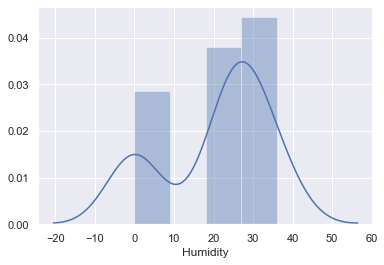

In [14]:
sns.distplot(inc_irri3['Humidity'])

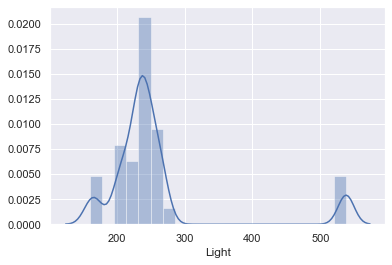

In [15]:
sns.distplot(inc_irri3['Light'])

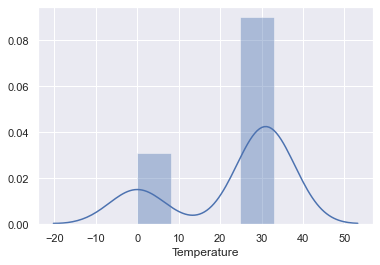

In [16]:
sns.distplot(inc_irri3['Temperature'])

sns.distplot(inc_irri['Total Liters'])

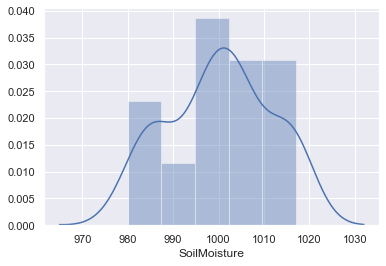

In [17]:
sns.distplot(inc_irri3['SoilMoisture'])

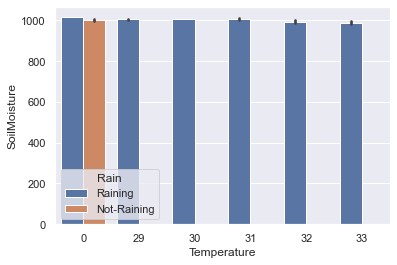

In [18]:
sns.barplot(inc_irri3['Temperature'], inc_irri['SoilMoisture'], hue=inc_irri['Rain'])

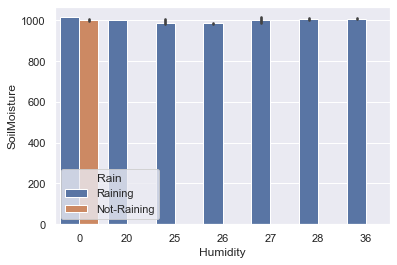

In [19]:
sns.barplot(inc_irri3['Humidity'], inc_irri['SoilMoisture'], hue=inc_irri['Rain'])

FUNCTION TO DRAW LINEAR REGRESSION MODELS

lmplot() is one of the most widely used function to quickly plot the Linear Relationship b/w 2 variables


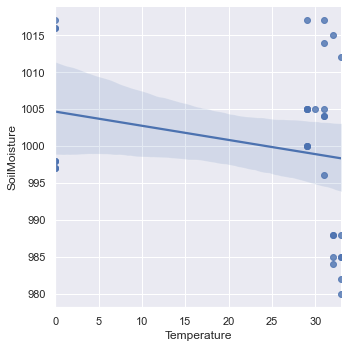

In [20]:
sns.lmplot(x="Temperature", y="SoilMoisture", data=inc_irri)

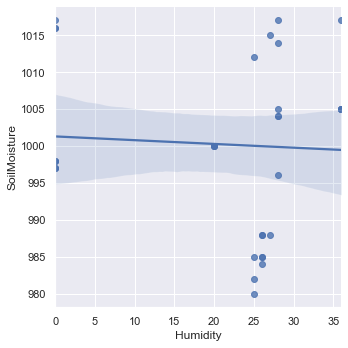

In [21]:
sns.lmplot(x="Humidity", y="SoilMoisture", data=inc_irri)

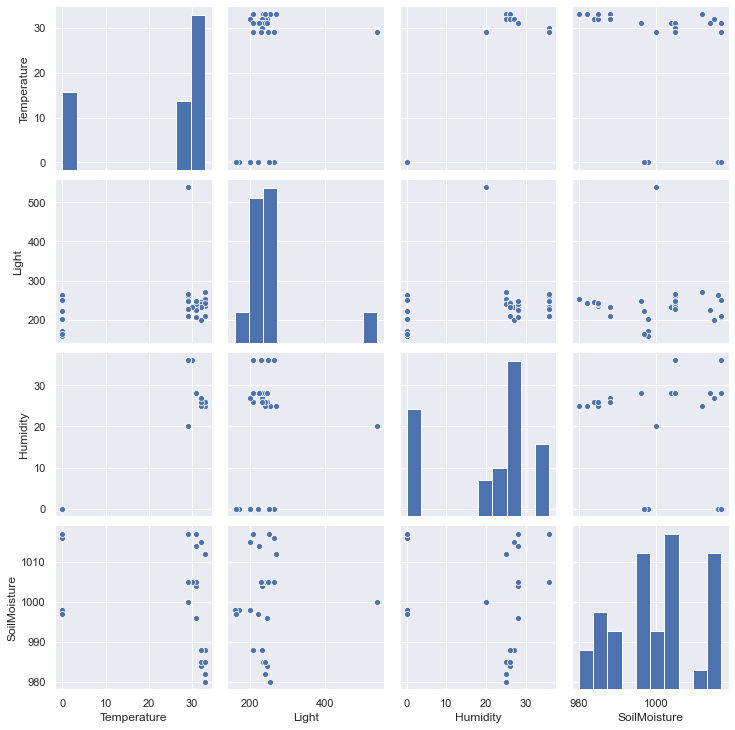

In [22]:
sns.pairplot(inc_irri[['Temperature', 'Light', 'Humidity', 'SoilMoisture']])

In [23]:
X = inc_irri3[['FlowRate', 'Temperature', 'Total Liters', 'Light', 'Humidity', 'Rain_Raining']].values
y = inc_irri3['SoilMoisture'].values

In [24]:
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [26]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

regressor = LinearRegression()  
regressor.fit(X_train, y_train)

coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])
coeff_df



In [27]:
print(regressor.intercept_)
print(regressor.coef_)

1028.5042073584614
[-1.05938248e-12 -1.59495387e+00  1.03193882e+02 -1.51424700e-01
  9.54613613e-01  2.85267303e+01]


In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

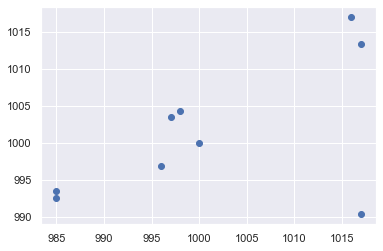

In [29]:
predictions = regressor.predict(X_test)
plt.scatter(y_test,predictions)

In [30]:
y_pred = regressor.predict(X_test)

In [31]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
0,1017,1013.344179
1,998,1004.276255
2,1017,990.345183
3,996,996.914648
4,997,1003.519132
5,1016,1017.054817
6,985,993.515826
7,1000,1000.000000
8,985,992.572637


In [32]:
y_pred

array([1013.34417857, 1004.27625533,  990.34518292,  996.91464802,
       1003.51913183, 1017.05481681,  993.51582621, 1000.        ,
        992.57263656])

In [33]:
y_test

array([1017,  998, 1017,  996,  997, 1016,  985, 1000,  985])

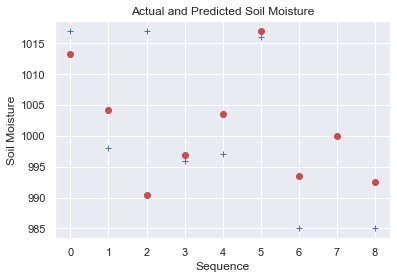

In [34]:
import matplotlib.pyplot as plt
#plt.style.use('seaborn-white')
fig, ax = plt.subplots()
ax.plot(y_test, 'b+', label='actual')
ax.plot(y_pred, 'ro', label='predicted')
# Graph labels
plt.xlabel('Sequence'); 
plt.ylabel('Soil Moisture'); 
plt.title('Actual and Predicted Soil Moisture');

In [35]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 6.79599480872077
Mean Squared Error: 104.17201166082559
Root Mean Squared Error: 10.206469108405


In [36]:
from sklearn.metrics import mean_squared_error, r2_score


In [37]:
r2_score(y_test, y_pred)

0.27856250474291455